# Basic and Arithemetic operation on image

In [1]:
import cv2

In [5]:
#how to find out readed image shape and size,dtype 
image=cv2.imread("image.jpg")
print(image.shape)#returns a tuple of number of rows ,columns and channels
print(image.size)#Returns total number of pixels
print(image.dtype)#reurn image datatype

(296, 474, 3)
420912
uint8


In [6]:
#how to split BGR color coordinates from readed image using split
image=cv2.imread("image.jpg")
b,g,r=cv2.split(image)
print(b,g,r)#it's split image each pixel bgr color coordinates

[[240 237 235 ...   0   0   3]
 [238 236 233 ...   0   0   0]
 [238 235 233 ...   4   0   0]
 ...
 [205 214 214 ...   0   0   0]
 [210 213 213 ...   0  13  11]
 [213 211 211 ...   3  19  19]] [[181 178 176 ...  86  68  67]
 [179 177 174 ...  91  72  72]
 [179 176 174 ... 116  89  88]
 ...
 [155 164 166 ... 219 229 231]
 [161 165 164 ... 220 235 235]
 [164 162 162 ... 219 236 236]] [[111 108 106 ... 125 100  97]
 [109 107 104 ... 123  99  96]
 [107 104 102 ... 138 105 104]
 ...
 [103 111 114 ... 232 241 240]
 [111 113 114 ... 226 240 240]
 [114 112 112 ... 224 239 239]]


In [9]:
#how to set one image bgr color coordinates to another image using merge
image1=cv2.imread("grayscale.jpg")
cv2.imshow("i",image1)
cv2.waitKey(4000)
#set above splited color coordinates to graysacle image
image1=cv2.merge((b,g,r))
cv2.imshow("i",image1)
cv2.waitKey(4000)
cv2.destroyAllWindows()
#here first it will display grayscale image after 4 seconds later it will display grayscale  image with color

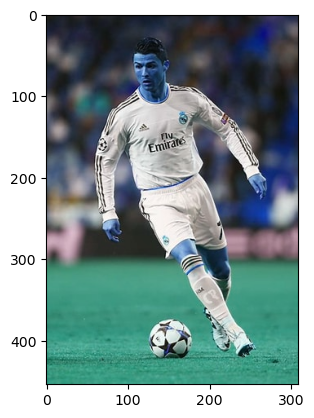

In [18]:
#roi
'''
ROI" stands for "Region of Interest." A Region of Interest refers to a specific portion or area within an image or video frame that you want to focus on or process separately from the rest of the image. 
The syntax for slicing should be [start_y:end_y, start_x:end_x]
'''
import matplotlib.pyplot as plt
ronaldo=cv2.imread("ronaldo.jfif")
plt.imshow(ronaldo)

In [40]:
#finding ball starting and ending position using mouse event
def clickevent(event,x,y,flags,param):
    if event==cv2.EVENT_RBUTTONDOWN:
        print("Position is:",(x,y))
ronaldo=cv2.imread("ronaldo.jfif")
cv2.imshow("image",ronaldo)
cv2.setMouseCallback("image",clickevent)
cv2.waitKey()
cv2.destroyAllWindows()

Position is: (117, 371)
Position is: (194, 420)


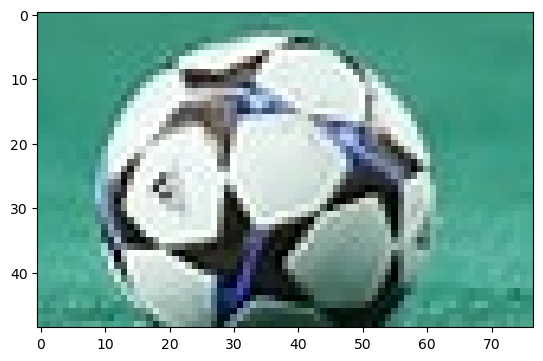

In [49]:
#extract ball position(roi)
ronaldo=cv2.imread("ronaldo.jfif")
img=ronaldo[371:420,117:194]#slicing syntax is [start_y:end_y,start_x:end_x]
plt.imshow(img)

In [46]:
#add extracted ball into ronaldo.jfif image file
 #first find out the which position we are going to add the ball (use mouse click event)
def clickevent(event,x,y,flags,param):
    if event==cv2.EVENT_RBUTTONDOWN:
        print("Position is:",(x,y))
ronaldo=cv2.imread("ronaldo.jfif")
cv2.imshow("image",ronaldo)
cv2.setMouseCallback("image",clickevent)
cv2.waitKey()
cv2.destroyAllWindows()

Position is: (23, 367)
Position is: (86, 422)


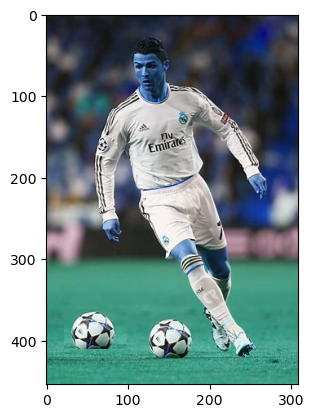

In [54]:
#adding extracted ball to imag
ronaldo=cv2.imread("ronaldo.jfif")
ronaldo[362:411,22:99]=img
plt.imshow(ronaldo)

In [ ]:
#explanation of adding extracted roi to image
'''
from ronaldo image i have extracted ball(extracted ball starty,endy,startx,endy is [117:371,194:420])
then i adding extracted roi image to ronald image(adding starty,endy,startx,endy is[22:362,99:411])
we need to keep differnt between coordinate same in both :
like,
extracted coordinates:420-371=49
                      194-117=77
adding extracted position coortinates:411-362=49
                                       99-22=77
so,both difference are same that's why it's worked.if it both difference are not same it won't be work throw the error

'''

In [31]:
#add function is used to add two images
image1=cv2.imread("ronaldo.jfif")
image2=cv2.imread("image.jpg")
added_image=cv2.add(image1,image2)
cv2.imshow('iii',added_image)
cv2.waitKey()
cv2.destroyAllWindows()
#why it giving erreor means both images size are not same 

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [32]:
#using resize function we can resize both the images as same
im1=cv2.resize(image1,(512,512))#width and height
im2=cv2.resize(image2,(512,512))
added_image=cv2.add(im1,im2)
cv2.imshow('iii',added_image)
cv2.waitKey()
cv2.destroyAllWindows()
#both images are added

In [37]:
#if we use add() function to add two images,both images are looking not good
#for that we can set one image high weight and one more image low weight then it will be looking good
#weight is opacity
added_image=cv2.addWeighted(im1,0.8,im2,0.2,0)#im1-image1,im2-image2,0.8-firstimage weight,0.2-second image weight,0-gomma
cv2.imshow('iii',added_image)                #gamma means it will add white color on the blending image or added image
cv2.waitKey()
cv2.destroyAllWindows()
#both images are added as we given weight